# Analysis of Scoring in the Top 5 Football (Soccer) Leagues

Aidan Jones

# Introduction

The purpose of this analysis is to explore the relationships in football goalscoring, examining player, team, and league statistics from the top 5 leagues in European football. This tutorial will take you through the entire data science pipeline and aims to answer the question:

**Can you predict a team's performance based on individual player statistics?**

These statistics hold significant weight in sports and this question will examine relationships between various important factors, including the players themselves, their teams, and their leagues. Analyzing these relationships could provide valuable insights to understanding player effectiveness as well as league goal-scoring tendencies.

*   By looking into the correlations between players' goal-scoring and their ability to produce assists, as well as their total g+a, we can understand how top scorers tend to contribute to the game
*   By connecting these statistics to team performance, we can reveal how star players impact team success
*   Lastly, by analyzing the distribution of scoring across the top 5 leagues, we gain insight into the scoring trends and environment of Europe's most competitive football leagues

# Data Curation

We will be getting our data and statistics from [football-data.org](https://www.football-data.org/), which provides free and up-to-date statistics from a number of football leagues, including standings, matches, teams, scorers, and players. The API allows you to make HTTP requests which you can modify to extract relevant information related to football.

We will be working with [Pandas](https://www.w3schools.com/python/pandas/default.asp), which is a great tool for structured data and will help us manipulate and analyze our dataset.

The following code cell imports the needed libraries and initializes the authentification token needed to make requests to the API.



In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import time

headers = {
    'X-Auth-Token': 'fe374d096ca14f38b21125063760091c'
}

**We will use the following code cells to build our final DataFrame. The final DataFrame includes columns player_id, player_name, player_playedMatches, match_ratio, goals, goal_ratio, assists, assist_ratio, penalties, g+a, g+a_ratio, team_id, team_name, team_league, team_position, team_playedMatches, team_points, team_goalsFor, and season.**

The following code cell initializes a DataFrame with statistics of the top 10 goalscorers from each league for a given set of years.

In [2]:
# Sets array with football league codes and specifies seasons by year
leagues = ['PL', 'PD', 'BL1', 'SA', 'FL1']
seasons = ['/?season=2022', '/?season=2023', '/?season=2024']

# DataFrame with top 10 scorers from each specified league
leagueTopScorersDf = pd.DataFrame()

# Adds top scorer data from each league and each year
for season in seasons:
  for league in leagues:
    url = f'https://api.football-data.org/v4/competitions/{league}/scorers{season}'
    response = requests.get(url, headers=headers)
    json = response.json()

    # Create DataFrame from json and merge with main DataFrame
    topScorersDf = pd.DataFrame(json['scorers'])
    topScorersDf['team_league'] = json['competition']['name']
    topScorersDf['season'] = season[9:]
    leagueTopScorersDf = pd.concat([leagueTopScorersDf, topScorersDf], ignore_index=True)
    time.sleep(7)

leagueTopScorersDf

,player,team,playedMatches,goals,assists,penalties,team_league,season
0,"{'id': 38101, 'name': 'Erling Haaland', 'first...","{'id': 65, 'name': 'Manchester City FC', 'shor...",36,36,8.0,7.0,Premier League,2022
1,"{'id': 8004, 'name': 'Harry Kane', 'firstName'...","{'id': 73, 'name': 'Tottenham Hotspur FC', 'sh...",38,30,3.0,5.0,Premier League,2022
2,"{'id': 5453, 'name': 'Ivan Toney', 'firstName'...","{'id': 402, 'name': 'Brentford FC', 'shortName...",33,20,4.0,6.0,Premier League,2022
3,"{'id': 3754, 'name': 'Mohamed Salah', 'firstNa...","{'id': 64, 'name': 'Liverpool FC', 'shortName'...",38,19,12.0,2.0,Premier League,2022
4,"{'id': 8251, 'name': 'Callum Wilson', 'firstNa...","{'id': 67, 'name': 'Newcastle United FC', 'sho...",32,18,5.0,3.0,Premier League,2022
...,...,...,...,...,...,...,...,...
145,"{'id': 128710, 'name': 'Evann Guessand', 'firs...","{'id': 522, 'name': 'OGC Nice', 'shortName': '...",13,6,1.0,NaN,Ligue 1,2024
146,"{'id': 130668, 'name': 'Arnaud Kalimuendo', 'f...","{'id': 529, 'name': 'Stade Rennais FC 1901', '...",12,6,NaN,4.0,Ligue 1,2024
147,"{'id': 48595, 'name': 'Keito Nakamura', 'first...","{'id': 547, 'name': 'Stade de Reims', 'shortNa...",13,6,1.0,NaN,Ligue 1,2024
148,"{'id': 2499, 'name': 'Hamed Traoré', 'firstNam...","{'id': 519, 'name': 'AJ Auxerre', 'shortName':...",11,6,1.0,NaN,Ligue 1,2024


Notice how the data in the player and team columns isn't flattened. We can apply lambda functions over the columns to create new columns with important information. We can also drop the original columns now that we don't need them.

We also plan on keeping track of both matches played by an individual player and their team throughout a season. It's important we rename columns to reflect this specification.

In [3]:
# Extract relevant player data
leagueTopScorersDf['player_id'] = leagueTopScorersDf['player'].apply(lambda x: x['id'])
leagueTopScorersDf['player_name'] = leagueTopScorersDf['player'].apply(lambda x: x['name'])
# Extract relevant team data
leagueTopScorersDf['team_id'] = leagueTopScorersDf['team'].apply(lambda x: x['id'])
leagueTopScorersDf['team_name'] = leagueTopScorersDf['team'].apply(lambda x: x['name'])

# Drop original player and team columns and rename columns
leagueTopScorersDf = leagueTopScorersDf.drop(columns=['player', 'team'])
leagueTopScorersDf = leagueTopScorersDf.rename(columns={'playedMatches': 'player_playedMatches'})

leagueTopScorersDf

,player_playedMatches,goals,assists,penalties,team_league,season,player_id,player_name,team_id,team_name
0,36,36,8.0,7.0,Premier League,2022,38101,Erling Haaland,65,Manchester City FC
1,38,30,3.0,5.0,Premier League,2022,8004,Harry Kane,73,Tottenham Hotspur FC
2,33,20,4.0,6.0,Premier League,2022,5453,Ivan Toney,402,Brentford FC
3,38,19,12.0,2.0,Premier League,2022,3754,Mohamed Salah,64,Liverpool FC
4,32,18,5.0,3.0,Premier League,2022,8251,Callum Wilson,67,Newcastle United FC
...,...,...,...,...,...,...,...,...,...,...
145,13,6,1.0,NaN,Ligue 1,2024,128710,Evann Guessand,522,OGC Nice
146,12,6,NaN,4.0,Ligue 1,2024,130668,Arnaud Kalimuendo,529,Stade Rennais FC 1901
147,13,6,1.0,NaN,Ligue 1,2024,48595,Keito Nakamura,547,Stade de Reims
148,11,6,1.0,NaN,Ligue 1,2024,2499,Hamed Traoré,519,AJ Auxerre


The following code cell initializes a DataFrame with team standings data for the same football leagues and year

In [4]:
# DataFrame with team standings from each specified league
leaguePositionsDf = pd.DataFrame()

# Adds team standings data from each league
for season in seasons:
  for league in leagues:
    url = f'https://api.football-data.org/v4/competitions/{league}/standings{season}'
    response = requests.get(url, headers=headers)
    json = response.json()

    # Create DataFrame from json and merge with main DataFrame
    positionsDf = pd.DataFrame(json['standings'][0]['table'])
    positionsDf['season'] = season[9:]
    leaguePositionsDf = pd.concat([leaguePositionsDf, positionsDf], ignore_index=True)
    time.sleep(7)

# Extract relevant team data
leaguePositionsDf['team_id'] = leaguePositionsDf['team'].apply(lambda x: x['id'])
leaguePositionsDf['team_name'] = leaguePositionsDf['team'].apply(lambda x: x['name'])

# Drop original team column and unimportant data, rename columns
leaguePositionsDf = leaguePositionsDf.drop(columns=['team', 'form', 'won', 'draw', 'lost', 'goalsAgainst', 'goalDifference'])
leaguePositionsDf = leaguePositionsDf.rename(columns={'position': 'team_position', 'playedGames': 'team_playedMatches', 'points': 'team_points', 'goalsFor': 'team_goalsFor'})

# Join team standings data into top scorer data
leagueTopScorersDf = pd.merge(leagueTopScorersDf, leaguePositionsDf, on=['team_id', 'team_name', 'season'], how='left')

leagueTopScorersDf

,player_playedMatches,goals,assists,penalties,team_league,season,player_id,player_name,team_id,team_name,team_position,team_playedMatches,team_points,team_goalsFor
0,36,36,8.0,7.0,Premier League,2022,38101,Erling Haaland,65,Manchester City FC,1,38,89,94
1,38,30,3.0,5.0,Premier League,2022,8004,Harry Kane,73,Tottenham Hotspur FC,8,38,60,70
2,33,20,4.0,6.0,Premier League,2022,5453,Ivan Toney,402,Brentford FC,9,38,59,58
3,38,19,12.0,2.0,Premier League,2022,3754,Mohamed Salah,64,Liverpool FC,5,38,67,75
4,32,18,5.0,3.0,Premier League,2022,8251,Callum Wilson,67,Newcastle United FC,4,38,71,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,13,6,1.0,NaN,Ligue 1,2024,128710,Evann Guessand,522,OGC Nice,6,13,20,24
146,12,6,NaN,4.0,Ligue 1,2024,130668,Arnaud Kalimuendo,529,Stade Rennais FC 1901,12,13,14,18
147,13,6,1.0,NaN,Ligue 1,2024,48595,Keito Nakamura,547,Stade de Reims,9,13,18,20
148,11,6,1.0,NaN,Ligue 1,2024,2499,Hamed Traoré,519,AJ Auxerre,8,13,19,21


Now that we have all of our data we can run this code to check for missing values

In [5]:
print(leagueTopScorersDf.isnull().sum())

player_playedMatches     0
goals                    0
assists                 12
penalties               45
team_league              0
season                   0
player_id                0
player_name              0
team_id                  0
team_name                0
team_position            0
team_playedMatches       0
team_points              0
team_goalsFor            0
dtype: int64


This information helps us clean up our data before we can fully utilize it.

*   We only have missing NaN values in the assists and penalties column, which are NaN when the player has no assists or penalties, so we can simply fill these in with the value 0.

Let's do some feature engineering to add features that may help the model with its predictions
*   We can add a g+a column as a quick measurement of a player's total offensive output.
*   We can add ratio columns that measure a player's goal and assists tally in comparison to their team's goal total, as well as the ratio of games a player played for their team. This helps indicate a player's overall contribution to their team.

In order to get a better visualization of our data, we may want to reorder the columns

In [43]:
# Fill missing NaN values
leagueTopScorersDf['goals'] = leagueTopScorersDf['goals'].fillna(0)
leagueTopScorersDf['assists'] = leagueTopScorersDf['assists'].fillna(0)
leagueTopScorersDf['penalties'] = leagueTopScorersDf['penalties'].fillna(0)

# Add g+a feature
leagueTopScorersDf['g+a'] = leagueTopScorersDf['goals'] + leagueTopScorersDf['assists']

# Add ratio features
leagueTopScorersDf['goal_ratio'] = leagueTopScorersDf['goals'] / leagueTopScorersDf['team_goalsFor']
leagueTopScorersDf['assist_ratio'] = leagueTopScorersDf['assists'] / leagueTopScorersDf['team_goalsFor']
leagueTopScorersDf['g+a_ratio'] = leagueTopScorersDf['g+a'] / leagueTopScorersDf['team_goalsFor']
leagueTopScorersDf['match_ratio'] = leagueTopScorersDf['player_playedMatches'] / leagueTopScorersDf['team_playedMatches']

# Reorder the DataFrame columns
col_order = ['player_id', 'player_name', 'player_playedMatches', 'match_ratio', 'goals', 'goal_ratio', 'assists', 'assist_ratio', 'penalties', 'g+a', 'g+a_ratio', 'team_id', 'team_name', 'team_league', 'team_position', 'team_playedMatches', 'team_points', 'team_goalsFor', 'season']
leagueTopScorersDf = leagueTopScorersDf[col_order]

leagueTopScorersDf

<ipython-input-43-7e1e7172b42f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leagueTopScorersDf['goals'] = leagueTopScorersDf['goals'].fillna(0)
<ipython-input-43-7e1e7172b42f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leagueTopScorersDf['assists'] = leagueTopScorersDf['assists'].fillna(0)
<ipython-input-43-7e1e7172b42f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

,player_id,player_name,player_playedMatches,match_ratio,goals,goal_ratio,assists,assist_ratio,penalties,g+a,g+a_ratio,team_id,team_name,team_league,team_position,team_playedMatches,team_points,team_goalsFor,season
0,38101,Erling Haaland,36,0.947368,36,0.382979,8.0,0.085106,7.0,44.0,0.468085,65,Manchester City FC,Premier League,1,38,89,94,2022
1,8004,Harry Kane,38,1.000000,30,0.428571,3.0,0.042857,5.0,33.0,0.471429,73,Tottenham Hotspur FC,Premier League,8,38,60,70,2022
2,5453,Ivan Toney,33,0.868421,20,0.344828,4.0,0.068966,6.0,24.0,0.413793,402,Brentford FC,Premier League,9,38,59,58,2022
3,3754,Mohamed Salah,38,1.000000,19,0.253333,12.0,0.160000,2.0,31.0,0.413333,64,Liverpool FC,Premier League,5,38,67,75,2022
4,8251,Callum Wilson,32,0.842105,18,0.264706,5.0,0.073529,3.0,23.0,0.338235,67,Newcastle United FC,Premier League,4,38,71,68,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,128710,Evann Guessand,13,1.000000,6,0.250000,1.0,0.041667,0.0,7.0,0.291667,522,OGC Nice,Ligue 1,6,13,20,24,2024
146,130668,Arnaud Kalimuendo,12,0.923077,6,0.333333,0.0,0.000000,4.0,6.0,0.333333,529,Stade Rennais FC 1901,Ligue 1,12,13,14,18,2024
147,48595,Keito Nakamura,13,1.000000,6,0.300000,1.0,0.050000,0.0,7.0,0.350000,547,Stade de Reims,Ligue 1,9,13,18,20,2024
148,2499,Hamed Traoré,11,0.846154,6,0.285714,1.0,0.047619,0.0,7.0,0.333333,519,AJ Auxerre,Ligue 1,8,13,19,21,2024


# Exploratory Data Analysis and Summary Statistics

In this section, we are going to use statistical methods and visualizations to explore our data and get a better understanding of the structure and trends in the data. We will start by looking at the main characteristics of our dataset.



### DataSet Characteristics

We can look at the number of rows (entries) and columns (features) in a DataFrame using df.shape as below. We also want to check if any features are overrepresented. In our case, since one team can have multiple top scorers, we use the groupby() function to aggregate over the team names and count their occurences in the league.

We will use [Matplotlib](https://matplotlib.org/stable/users/explain/quick_start.html) and [Seaborn](https://seaborn.pydata.org/tutorial/introduction.html) to plot our visualizations throughout this tutorial. More information about these tools can be accessed through the links.

### Conclusions
* 150 entries and 19 features
* No missing values (we filled these in earlier)
* Certain teams may be overrepresented as they can appear multiple times for the top ten scorers in an individual league .

Number of entries: 150
Number of features: 19
player_id               0
player_name             0
player_playedMatches    0
match_ratio             0
goals                   0
goal_ratio              0
assists                 0
assist_ratio            0
penalties               0
g+a                     0
g+a_ratio               0
team_id                 0
team_name               0
team_league             0
team_position           0
team_playedMatches      0
team_points             0
team_goalsFor           0
season                  0
dtype: int64


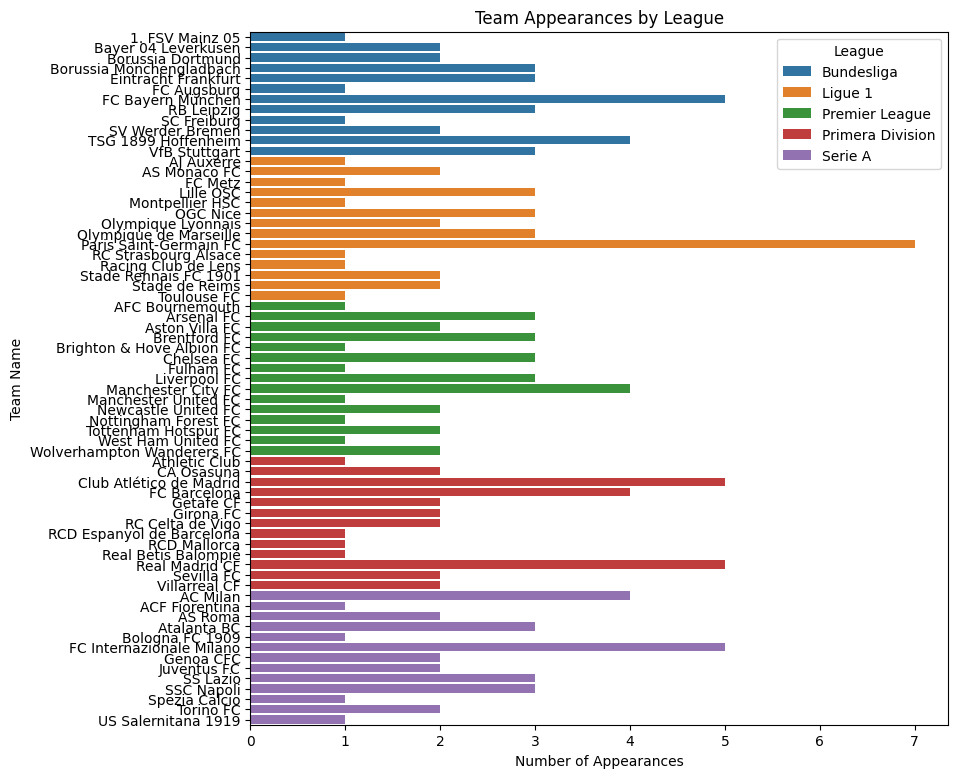

In [44]:
print(f"Number of entries: {leagueTopScorersDf.shape[0]}")
print(f"Number of features: {leagueTopScorersDf.shape[1]}")
print(leagueTopScorersDf.isnull().sum())

team_counts = leagueTopScorersDf.groupby(['team_league', 'team_name']).size().reset_index(name='count')
# Create a bar plot for team counts by league
plt.figure(figsize=(9, 9))
sns.barplot(x='count', y='team_name', hue='team_league', data=team_counts)
plt.title('Team Appearances by League')
plt.xlabel('Number of Appearances')
plt.ylabel('Team Name')
plt.legend(title='League')
plt.show()

Now that we have a general picture of our dataset, let's start exploring the relationships in the data to identify features that are correlated. This will guide us in choosing a machine learning technique to answer our main question.

### Pearson Correlation Coefficient Matrix for the variables goals, assists, g+a, team position, and team points

A Pearson Correlation Coefficient Matrix can help us visualize the correlation between individual features in our data. This will help identify multicollinearity

### Conclusions
* Goals, assists, and g+a have a moderate to strong correlation with team points and weak negative correlation with team position, suggesting these stats all contribute to overall team success.
* Goals has a moderate positive correlation with assists, while both goals and assists have a strong positive correlation with g+a, meaning players that score a lot may be more likely to assist, and players with high individual goal or assist tallies are likely to have high g+a.
* Penalties has moderate positive correlations with goals and g+a, suggesting players who score more penalties tend to score more in total. However, penalties seems to have little to no correlation with assists, as well as little correlation with team success.
* Team goals have a significant impact on team success, and are strongly and positively correlated goals, assists, and g+a

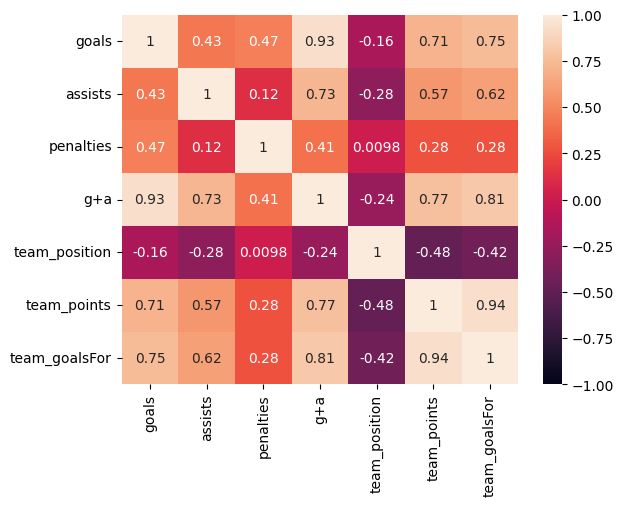

In [45]:
correlation_matrix = leagueTopScorersDf[['goals', 'assists', 'penalties', 'g+a', 'team_position', 'team_points', 'team_goalsFor']].corr()
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1)
plt.show()

Our final statistical technique will use hypothesis testing and applies an  [ANOVA](https://www.qualtrics.com/experience-management/research/anova/#:~:text=ANOVA%2C%20or%20Analysis%20of%20Variance,more%20unrelated%20samples%20or%20groups.) test to study the relationship between team_league and player's g+a.

### Hypothesis Testing


*   HO: The league of an individual player does not have an impact on the player's g+a
*   HA: The league of an individual player does have an impact on the player's g+a

### Conclusions
* The p-value is 0.019 which indicates very strong differences between the leagues which goes against the null hypothesis.  Reject the null hypothesis.
* Post-hoc tests are needed to identify which groups significantly differ from each other
* Serie A contains an outlier
* Data tends to have a positive skew
* Median g+a tends to be lower than mean
* Range differs significantly between leagues
* Interquartile range tends to be similar with the exception of Serie A



P-value: 0.23899199536850654


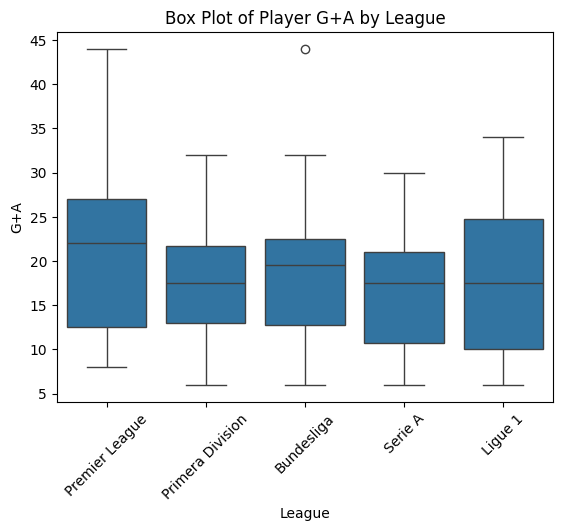

In [9]:
import scipy.stats as stats

# Apply ANOVA test on g+a for each league
df_pl = leagueTopScorersDf[leagueTopScorersDf['team_league'] == 'Premier League']
df_pd = leagueTopScorersDf[leagueTopScorersDf['team_league'] == 'Primera Division']
df_bl1 = leagueTopScorersDf[leagueTopScorersDf['team_league'] == 'Bundesliga']
df_sa = leagueTopScorersDf[leagueTopScorersDf['team_league'] == 'Serie A']
df_fl1 = leagueTopScorersDf[leagueTopScorersDf['team_league'] == 'Ligue 1']
result = stats.f_oneway(df_pl['g+a'], df_pd['g+a'], df_bl1['g+a'], df_sa['g+a'], df_fl1['g+a'])
print(f"P-value: {result.pvalue}")

# Plot
sns.boxplot(x='team_league', y='g+a', data=leagueTopScorersDf)
plt.title('Box Plot of Player G+A by League')
plt.xlabel('League')
plt.ylabel('G+A')
plt.xticks(rotation=45)
plt.show()

# Machine Learning Analysis

Based on our exploratory data analysis, we have some insights that will affect our chosen machine learning algorithm:

*   We know that goal-scoring statistics all have a weak to moderate correlation with team success
*   We know that the league a player plays in likely affects their goal-scoring ability

As weaker correlations dominate our matrix, we want to use a machine learning technique that captures non-linear relationships. We will also want to use a technique that handles both numerical and categorical features and provides feature importance, so for this we choose Random Forest Regression.

In the following code cell, we first prepare the data by splitting into a training and test set (80% train, 20% test). We want to measure team success with both team_points and team_position as our target variables, so we can have 2 different models trained on different features.

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Features and target for team_points
features_points = ['goals', 'assists', 'penalties', 'g+a', 'team_league', 'goal_ratio', 'assist_ratio', 'g+a_ratio', 'match_ratio']
X_points = leagueTopScorersDf[features_points]
y_points = leagueTopScorersDf['team_points']
# Features and target for team_position
features_position = ['goals', 'assists', 'penalties', 'g+a', 'team_league', 'goal_ratio', 'assist_ratio', 'g+a_ratio', 'match_ratio']
X_position = leagueTopScorersDf[features_position]
y_position = leagueTopScorersDf['team_position']

# Encode categorical variables
le = LabelEncoder()
X_points.loc[:, 'team_league'] = le.fit_transform(X_points['team_league'])
X_position.loc[:, 'team_league'] = le.fit_transform(X_position['team_league'])

# Split the data for team_points prediction
X_train_points, X_test_points, y_train_points, y_test_points = train_test_split(X_points, y_points, test_size=0.2, random_state=42)

# Split the data for team_position prediction
X_train_position, X_test_position, y_train_position, y_test_position = train_test_split(X_position, y_position, test_size=0.2, random_state=42)


Now that we have split our data it's time to train our model. We are training 2 separate models, one for team points and one for team positition. n_estimators represents the number of decision trees that will be used in our regression.

In [70]:
# Model for team_points prediction
rf_points = RandomForestRegressor(n_estimators=200, random_state=42)
rf_points.fit(X_train_points, y_train_points)

# Model for team_position prediction
rf_position = RandomForestRegressor(n_estimators=200, random_state=42)
rf_position.fit(X_train_position, y_train_position)

RandomForestRegressor(n_estimators=200, random_state=42)

We can make predictions on our test set using these models and print the error we get. Our MSE gives us the magnitude or error in our model's predictions and the r-squared tells us how well the model explains the variance in the data.

In [71]:
# Predictions for team_points
y_pred_points = rf_points.predict(X_test_points)
# Get mean squared error and r-squared
mse_points = mean_squared_error(y_test_points, y_pred_points)
r2_points = r2_score(y_test_points, y_pred_points)
print("Team Points Prediction:")
print(f"Mean Squared Error: {mse_points}")
print(f"R-squared Score: {r2_points}")

# Predictions for team_position
y_pred_position = rf_position.predict(X_test_position)
# Get mean squared error and r-squared
mse_position = mean_squared_error(y_test_position, y_pred_position)
r2_position = r2_score(y_test_position, y_pred_position)
print("\nTeam Position Prediction:")
print(f"Mean Squared Error: {mse_position}")
print(f"R-squared Score: {r2_position}")

Team Points Prediction:
Mean Squared Error: 99.12790250000002
R-squared Score: 0.7923322301881961

Team Position Prediction:
Mean Squared Error: 21.24655083333333
R-squared Score: 0.11060950000000025


Ideally, we want to our MSE to be as low as possible and our r-squared to be as close to 1 as possible. Our values indicate our model is performing very poorly on predicting team position.

### Visualization

We can plot our predicted and actual outcomes using scatter plots for both models. This helps us visualize how close our predictions were to the actual values.

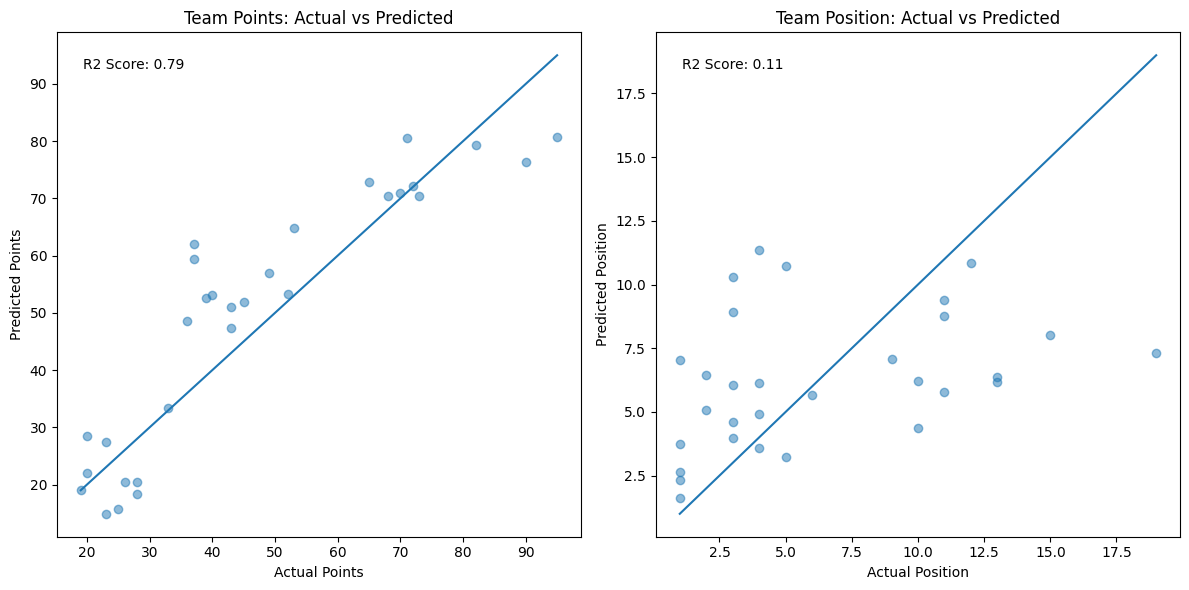

In [73]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot for team_points prediction
ax1.scatter(y_test_points, y_pred_points, alpha=0.5)
ax1.plot([y_test_points.min(), y_test_points.max()], [y_test_points.min(), y_test_points.max()])
ax1.set_xlabel('Actual Points')
ax1.set_ylabel('Predicted Points')
ax1.set_title('Team Points: Actual vs Predicted')
ax1.text(0.05, 0.95, f'R2 Score: {r2_score(y_test_points, y_pred_points):.2f}', transform=ax1.transAxes, verticalalignment='top')

# Plot for team_position prediction
ax2.scatter(y_test_position, y_pred_position, alpha=0.5)
ax2.plot([y_test_position.min(), y_test_position.max()], [y_test_position.min(), y_test_position.max()])
ax2.set_xlabel('Actual Position')
ax2.set_ylabel('Predicted Position')
ax2.set_title('Team Position: Actual vs Predicted')
ax2.text(0.05, 0.95, f'R2 Score: {r2_score(y_test_position, y_pred_position):.2f}', transform=ax2.transAxes, verticalalignment='top')

plt.tight_layout()
plt.show()

As stated previously, our model is performing poorly on predicting team position. You can see from our plot above that our points are far away from the line and therefore our predictions were far away from their actual values.

In order to improve the model's performance, we can examine the importance of the features in our model and use these to perform feature engineering.

In [74]:
# Feature importance for team_points prediction
importances_points = rf_points.feature_importances_
feature_importance_points = pd.DataFrame({'feature': X_train_points.columns, 'importance': importances_points})
feature_importance_points = feature_importance_points.sort_values('importance', ascending=False)

print("\nFeature Importance for Team Points Prediction:")
print(feature_importance_points)

# Feature importance for team_position prediction
importances_position = rf_position.feature_importances_
feature_importance_position = pd.DataFrame({'feature': X_train_position.columns, 'importance': importances_position})
feature_importance_position = feature_importance_position.sort_values('importance', ascending=False)

print("\nFeature Importance for Team Position Prediction:")
print(feature_importance_position)


Feature Importance for Team Points Prediction:
        feature  importance
0         goals    0.383397
3           g+a    0.330321
7     g+a_ratio    0.109912
5    goal_ratio    0.092220
4   team_league    0.022192
8   match_ratio    0.020261
6  assist_ratio    0.017664
2     penalties    0.013201
1       assists    0.010832

Feature Importance for Team Position Prediction:
        feature  importance
5    goal_ratio    0.198401
7     g+a_ratio    0.189540
3           g+a    0.149370
8   match_ratio    0.102000
6  assist_ratio    0.101961
0         goals    0.083370
1       assists    0.081005
4   team_league    0.049659
2     penalties    0.044694


We can make some key observations using this feature importance analysis. For one, the importance of different features varies for team points and team position. An individual player's goal tally and g+a is very important in influencing team points, but not so much team position. Goal ratio appears to be more important for team position, and assist ratio and g+a also have some weight.

**Let's do some more feature engineering to improve our model.**

Based on these observations, total scoring seems to be important for predicting team points, so we will keep these in our point model. However, ratio statistics seem to be more important for determining team position, therefore we will drop raw scoring counts (goals, assists, g+a) from the position model. We will also add 'per game' statistics to this model to see if accuracy improves.


We will drop penalties from the features used in both models to try to reduce noise. We will also drop team_league from the team position features as this has very little effect on a team's standing in their league.

In [75]:
# Add per game statistics to use in our position model
leagueTopScorersDf['gpg'] = leagueTopScorersDf['goals'] / leagueTopScorersDf['player_playedMatches']
leagueTopScorersDf['apg'] = leagueTopScorersDf['assists'] / leagueTopScorersDf['player_playedMatches']
leagueTopScorersDf['g+a_pg'] = leagueTopScorersDf['g+a'] / leagueTopScorersDf['player_playedMatches']

In [79]:
# Features and target for team_points
features_points = ['goals', 'assists', 'g+a', 'team_league', 'goal_ratio', 'assist_ratio', 'g+a_ratio', 'match_ratio']
X_points = leagueTopScorersDf[features_points]
y_points = leagueTopScorersDf['team_points']
# Features and target for team_position
features_position = ['goal_ratio', 'assist_ratio', 'g+a_ratio', 'match_ratio', 'gpg', 'apg', 'g+a_pg']
X_position = leagueTopScorersDf[features_position]
y_position = leagueTopScorersDf['team_position']

# Encode categorical variables
le = LabelEncoder()
X_points.loc[:, 'team_league'] = le.fit_transform(X_points['team_league'])

# Split the data for team_points prediction
X_train_points, X_test_points, y_train_points, y_test_points = train_test_split(X_points, y_points, test_size=0.2, random_state=42)

# Split the data for team_position prediction
X_train_position, X_test_position, y_train_position, y_test_position = train_test_split(X_position, y_position, test_size=0.2, random_state=42)

# Model for team_points prediction
rf_points = RandomForestRegressor(n_estimators=200, random_state=42)
rf_points.fit(X_train_points, y_train_points)

# Model for team_position prediction
rf_position = RandomForestRegressor(n_estimators=200, random_state=42)
rf_position.fit(X_train_position, y_train_position)

# Predictions for team_points
y_pred_points = rf_points.predict(X_test_points)
# Get mean squared error and r-squared
mse_points = mean_squared_error(y_test_points, y_pred_points)
r2_points = r2_score(y_test_points, y_pred_points)
print("Team Points Prediction:")
print(f"Mean Squared Error: {mse_points}")
print(f"R-squared Score: {r2_points}")

# Predictions for team_position
y_pred_position = rf_position.predict(X_test_position)
# Get mean squared error and r-squared
mse_position = mean_squared_error(y_test_position, y_pred_position)
r2_position = r2_score(y_test_position, y_pred_position)
print("\nTeam Position Prediction:")
print(f"Mean Squared Error: {mse_position}")
print(f"R-squared Score: {r2_position}")

# Feature importance for team_points prediction
importances_points = rf_points.feature_importances_
feature_importance_points = pd.DataFrame({'feature': X_train_points.columns, 'importance': importances_points})
feature_importance_points = feature_importance_points.sort_values('importance', ascending=False)

print("\nFeature Importance for Team Points Prediction:")
print(feature_importance_points)

# Feature importance for team_position prediction
importances_position = rf_position.feature_importances_
feature_importance_position = pd.DataFrame({'feature': X_train_position.columns, 'importance': importances_position})
feature_importance_position = feature_importance_position.sort_values('importance', ascending=False)

print("\nFeature Importance for Team Position Prediction:")
print(feature_importance_position)

Team Points Prediction:
Mean Squared Error: 95.34302666666669
R-squared Score: 0.8002613470513611

Team Position Prediction:
Mean Squared Error: 9.58819416666667
R-squared Score: 0.5986337325581395

Feature Importance for Team Points Prediction:
        feature  importance
0         goals    0.382844
2           g+a    0.333792
6     g+a_ratio    0.112008
4    goal_ratio    0.093908
3   team_league    0.023697
7   match_ratio    0.022623
5  assist_ratio    0.019564
1       assists    0.011565

Feature Importance for Team Position Prediction:
        feature  importance
6        g+a_pg    0.231393
0    goal_ratio    0.209914
2     g+a_ratio    0.186425
4           gpg    0.167927
3   match_ratio    0.084266
5           apg    0.066499
1  assist_ratio    0.053576


### Visualization

Let's vizualize our model's predictions one more time

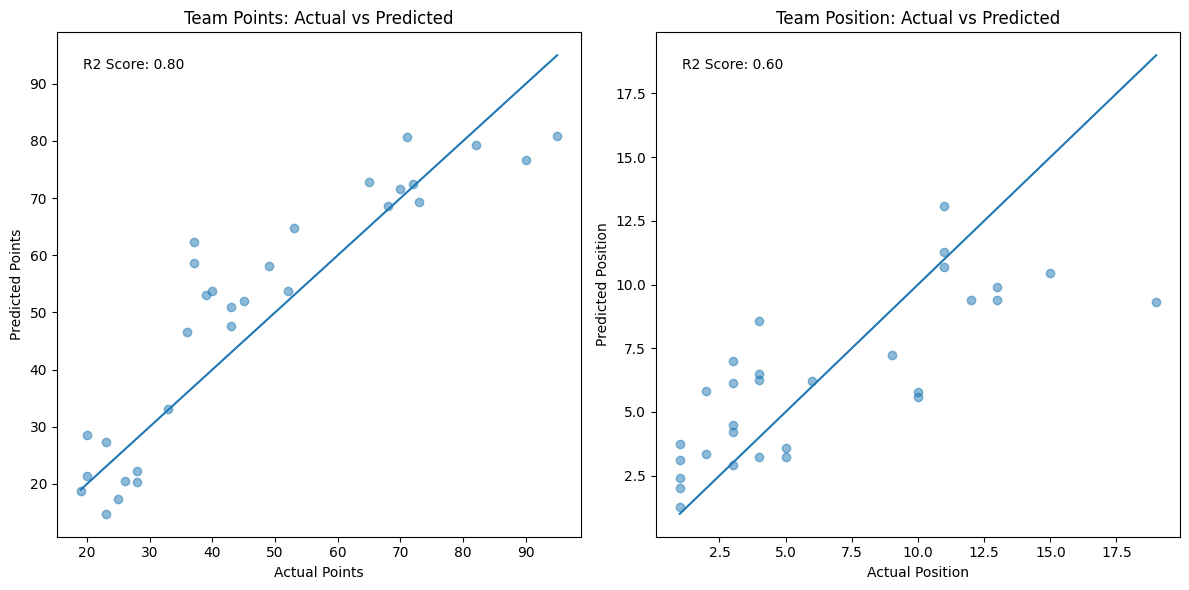

In [77]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot for team_points prediction
ax1.scatter(y_test_points, y_pred_points, alpha=0.5)
ax1.plot([y_test_points.min(), y_test_points.max()], [y_test_points.min(), y_test_points.max()])
ax1.set_xlabel('Actual Points')
ax1.set_ylabel('Predicted Points')
ax1.set_title('Team Points: Actual vs Predicted')
ax1.text(0.05, 0.95, f'R2 Score: {r2_score(y_test_points, y_pred_points):.2f}', transform=ax1.transAxes, verticalalignment='top')

# Plot for team_position prediction
ax2.scatter(y_test_position, y_pred_position, alpha=0.5)
ax2.plot([y_test_position.min(), y_test_position.max()], [y_test_position.min(), y_test_position.max()])
ax2.set_xlabel('Actual Position')
ax2.set_ylabel('Predicted Position')
ax2.set_title('Team Position: Actual vs Predicted')
ax2.text(0.05, 0.95, f'R2 Score: {r2_score(y_test_position, y_pred_position):.2f}', transform=ax2.transAxes, verticalalignment='top')

plt.tight_layout()
plt.show()

# Insights and Conclusion

Up to this point, we have trained our model to answer the question:

**Can you predict a team's performance based on individual player statistics?**

As you can see from our plot and from our new MSE and r-squared values, our points model improved slightly and our position model improved significantly from these changes. Based on these observations, we can make some conclusions about our data:

*   Scoring totals are very important in influencing team points throughout a season, but a player's 'per-game' scoring or their ratio of scoring compared to the team's is not as impactful.
*   'Per-game' scoring and ratios of scoring are very important in influencing team position, but a player's scoring totals is not as impactful.
*   Goal-scoring is more important in determining team success than assist-making

**These findings suggest that individual goal-scoring is correlated with, but not determinant, of team success**. Total scoring and per-game scoring seems to affect team points and team position differently: the differences imply that having consistent and high goal-scoring contributes more to overall team points, but individual player contribution to a team's scoring may have a greater impact on the team's position in the standings. Most importantly, there are likely other factors contributing to team success outside of individual performance.

I hope this tutorial through the data science pipeline has given you a greater understanding of how data can be collected, processed, analyzed, and used in machine learning in order to generate valuable insights.